In [2]:
#Unit 5
#Jeremy Koertzen
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
%matplotlib inline


In [5]:
#Functions:

def potential(x,y,N,L,Vo):
    V = 0
    for n in range(1,int(N),2):
        a = Vo*4/(n*np.pi)
        b = (n*np.pi)/L
        V += a*np.sin(b*x)*np.exp(-b*y)
    return V

def v_expected(x,y,L,Vo):
    V = (2*Vo/np.pi)*np.arctan(np.sin(np.pi*x/L)/np.sinh(np.pi*y/L))
    return V

def efield(x,y,N,L,Vo):
    Ex = 0
    Ey = 0
    for n in range(1,int(N),2):
        a = Vo*4/(n*np.pi)
        b = (n*np.pi)/L
        Ex += -a*b*np.cos(b*x)*np.exp(-b*y)
        Ey += -a*np.sin(b*x)*-b*np.exp(-b*y)
    return Ex,Ey

def fieldlines(x,y,N,L,Vo):
    step = 0.5
    dx = 0
    dy = 0
    counter = 0
    print('size of x: ',np.size(x))
    for i in range(np.size(x)):
        counter = 0
        while(counter <= 1000):
            counter += 1
            #print('x[i]: ',x[i])
            Ex,Ey = efield(x[i],y[i],N,L,Vo)
            #print('Ex: ',Ex)
            #print('Ey: ',Ey)
            E = (Ex**2 + Ey**2)**0.5
            xold = x[i]
            yold = y[i]
            dx = (Ex / E)*step
            dy = (Ey / E)*step
            #print('dx: ',dx)
            #print('x: ',x)
            x[i] += dx
            y[i] += dy
            x_plot = [xold,x[i]]
            y_plot = [yold,y[i]]
            #print('xplot: ',x_plot)
            #print('yplot: ',y_plot)
            plt.xlim(0,50)
            plt.ylim(0,150)
            plt.plot(x_plot,y_plot,color='grey',markersize=2)
            if(x[i]<=0 or x[i]>=50):
                break



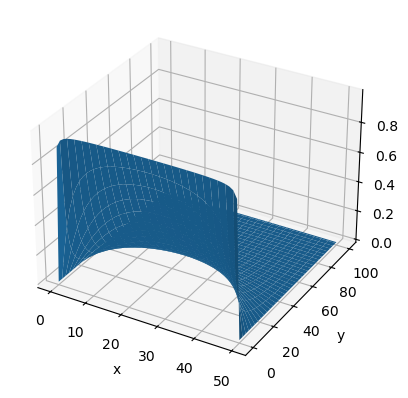

In [4]:
#Question 1:

#Creating the grid:

coords = np.mgrid[0:101,0:51]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Calculating the potential:

V = potential(xgrid,ygrid,100,50,1.)

#Creating the plot:

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(xgrid,ygrid,V)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


size of x:  50


Text(0, 0.5, 'y')

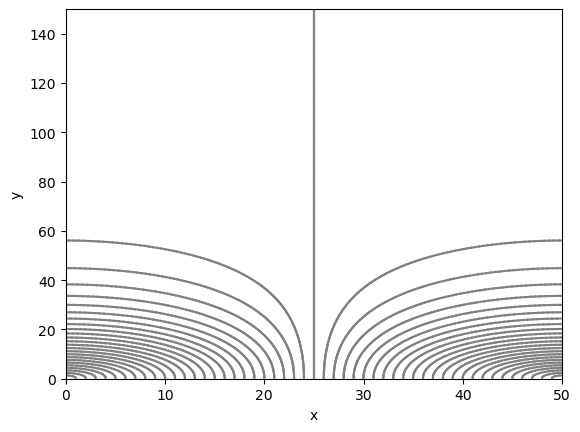

In [12]:
#Question 2: 

#Creating the starting points:

L = 50.
N = 100
Vo = 1.

x = 1.*np.arange(0,50,1.)
y = .1*np.ones(50) #Doesn't work if I start at exactly y=0.
#print('x: ',x)

field = fieldlines(x,y,N,L,Vo)
plt.xlabel('x')
plt.ylabel('y')

#Since at y=0 the potential is highest, it makes sense that the 
#electric field lines will point towards the surfaces of low 
#potential, which are at x=0 and x=50. It also makes sense for
#the line coming from x=25 to go straight up because the symmetry
#makes it so that the electric field points to y=infinity, where
#the potential is also zero. 


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_39828\2013429539.py:12: RuntimeWarning: divide by zero encountered in divide
  V = (2*Vo/np.pi)*np.arctan(np.sin(np.pi*x/L)/np.sinh(np.pi*y/L))
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_39828\2013429539.py:12: RuntimeWarning: invalid value encountered in divide
  V = (2*Vo/np.pi)*np.arctan(np.sin(np.pi*x/L)/np.sinh(np.pi*y/L))
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_39828\2932324347.py:16: RuntimeWarning: invalid value encountered in divide
  error = np.abs((V - V_expected)/V)


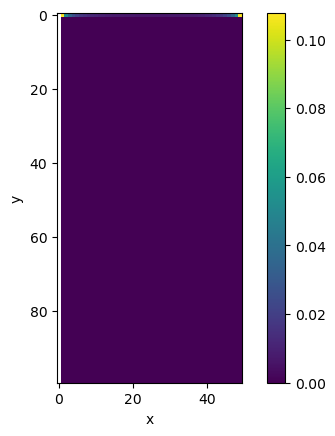

In [20]:
#Question 3: (FIX)

coords = np.mgrid[0:100,0:50]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]
x = np.linspace(0,50,50)
y = np.linspace(0,100,50)

#Calculating the potential:

V = potential(xgrid,ygrid,100,50,1.)
V_expected = v_expected(xgrid,ygrid,50,1.)

#Calculating the uncertainty:

error = np.abs((V - V_expected)/V)
plt.imshow(error)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()

#Based on this plot, almost all of the error is near y=0. This sort of
#makes sense because the potential goes to zero as y gets larger, so
#the two methods are fairly close to one another. I can also see that
#the error increased near x-boundaries. This also makes sense because
#at these corner points the potential changes very quickly from V=1
#to V=0, so there is more opporitunity for error. I thought the
#error would be non-zero in more places, so I probably did it wrong.

